**a. Eksplorasi Data**

**Import Library**

In [ ]:
import os
import cv2
import numpy as np
import warnings
import glob
import matplotlib.pyplot as plt
import keras
import keras.layers as layers


from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
from skimage import io
from PIL import Image
from random import randint
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Import Data from Kaggle**

In [ ]:
folder = {
    'batik-sekar' : '/kaggle/input/dataset2d/batik-sekar',
    'batik-sidoluhur' : '/kaggle/input/dataset2d/batik-sidoluhur',
    'batik-sidomukti' : '/kaggle/input/dataset2d/batik-sidomukti',
    'batik-sogan' : '/kaggle/input/dataset2d/batik-sogan',
    'batik-tambal' : '/kaggle/input/dataset2d/batik-tambal'
}

for i, j in folder.items():
    files = os.listdir(j)
    print("Banyak foto di dalam", i, ":", len(files))

Banyak foto di dalam batik-sekar : 47
Banyak foto di dalam batik-sidoluhur : 50
Banyak foto di dalam batik-sidomukti : 46
Banyak foto di dalam batik-sogan : 50
Banyak foto di dalam batik-tambal : 50


Output diatas menunjukkan banyaknya data dalam tiap folder batik sekar, batik sidoluhur, batik sidomukti, batik sogan, dan batik tambal.

**Data Loading, Resize, and Formating**

In [ ]:
path = '/kaggle/input/dataset2d/'
class_names = sorted(os.listdir(path))
n_class = len(class_names)

img_size = (64, 64, 3)

Resize resolusi gambar menjadi 64x64 pixel agar data dapat diproses sebagai input dalam model arsitektur.

In [ ]:
# untuk menyimpan data class dan path image
labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + '/' +  cl):
        label = np.zeros(n_class)
        label[class_names.index(cl)] = 1
        labels.append(label)

        image = np.asarray(cv2.resize(cv2.imread(path + '/' + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2]))
        images.append(image)
    print('done')

images:

batik-sekar -> done
batik-sidoluhur -> done
batik-sidomukti -> done
batik-sogan -> done
batik-tambal -> done


In [ ]:
labels = np.asarray(labels)
IMG = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {IMG.shape}')



labels shape: (243, 5)
images shape: (243, 64, 64, 3)


**Data Visualization**

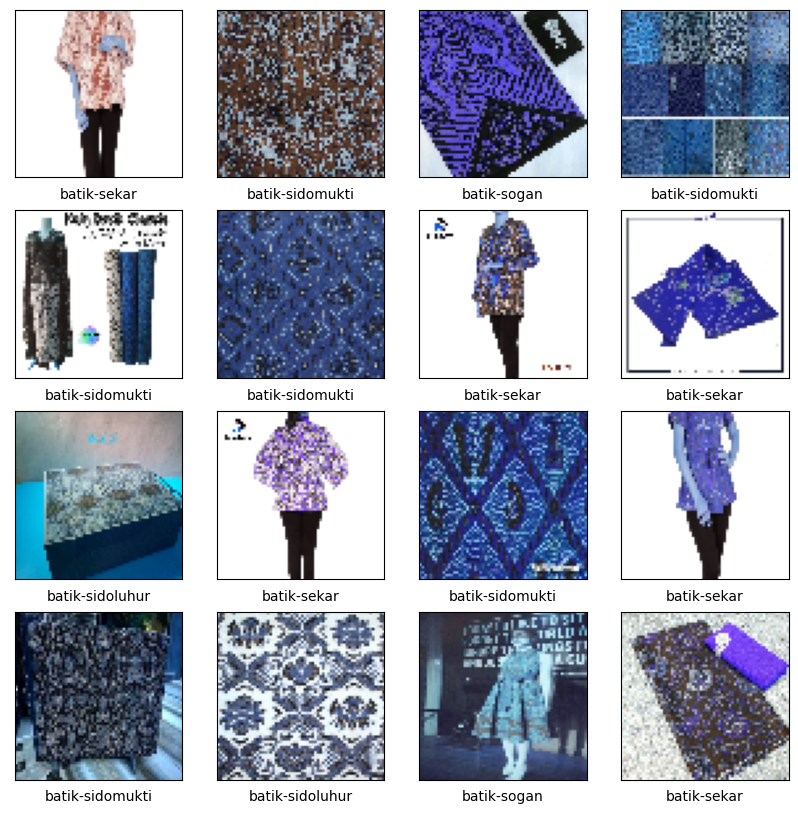

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        z = randint(0,int(len(IMG)*0.8))

        axs[i][j].imshow(images[z])

        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])
        axs[i][j].set_xlabel(class_names[np.argmax(labels[z])])

plt.show()

Visualisasi diatas menunjukkan 16 gambar secara acak yang ada dalam tiap folder batik dengan ukuran 10x10.

**Check the Histogram Color**

<BarContainer object of 255 artists>

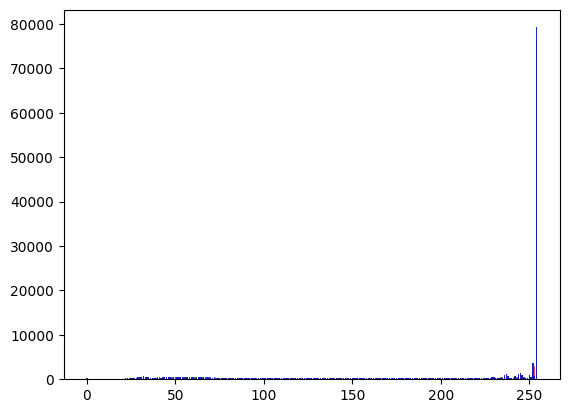

In [ ]:
root = '/kaggle/input/dataset2d/batik-sekar'

red = 0
green = 0
blue = 0

for image in os.listdir(root):
    if image.endswith('.jpg'):
        x = io.imread(root+'/'+image)
        hist_r = np.histogram(x[0], bins=255, range=[0, 255])
        hist_g = np.histogram(x[1], bins=255, range=[0, 255])
        hist_b = np.histogram(x[2], bins=255, range=[0, 255])
        red += hist_r[0]
        green += hist_g[0]
        blue += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], red, color='r', alpha=0.7)
plt.bar(bins[:-1], green, color='g', alpha=0.7)
plt.bar(bins[:-1], blue, color='b', alpha=0.7)

<BarContainer object of 255 artists>

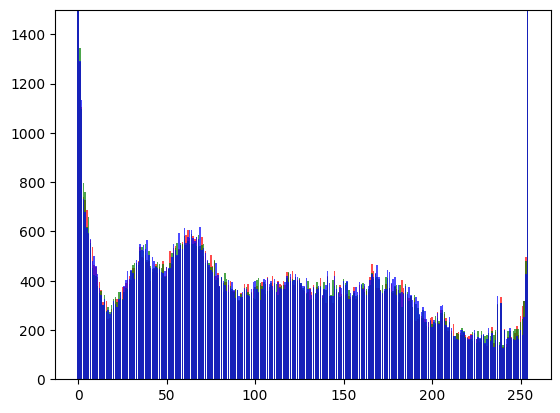

In [ ]:
root = '/kaggle/input/dataset2d/batik-sidoluhur'

red = 0
green = 0
blue = 0

for image in os.listdir(root):
    if image.endswith('.jpg'):
        x = io.imread(root+'/'+image)
        hist_r = np.histogram(x[0], bins=255, range=[0, 255])
        hist_g = np.histogram(x[1], bins=255, range=[0, 255])
        hist_b = np.histogram(x[2], bins=255, range=[0, 255])
        red += hist_r[0]
        green += hist_g[0]
        blue += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.ylim([0,1500])
plt.bar(bins[:-1], red, color='r', alpha=0.7)
plt.bar(bins[:-1], green, color='g', alpha=0.7)
plt.bar(bins[:-1], blue, color='b', alpha=0.7)

<BarContainer object of 255 artists>

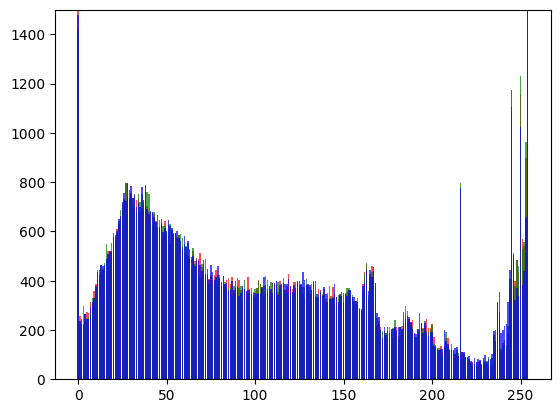

In [ ]:
root = '/kaggle/input/dataset2d/batik-sidomukti'

red = 0
green = 0
blue = 0

for image in os.listdir(root):
    if image.endswith('.jpg'):
        x = io.imread(root+'/'+image)
        hist_r = np.histogram(x[0], bins=255, range=[0, 255])
        hist_g = np.histogram(x[1], bins=255, range=[0, 255])
        hist_b = np.histogram(x[2], bins=255, range=[0, 255])
        red += hist_r[0]
        green += hist_g[0]
        blue += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.ylim([0,1500])
plt.bar(bins[:-1], red, color='r', alpha=0.7)
plt.bar(bins[:-1], green, color='g', alpha=0.7)
plt.bar(bins[:-1], blue, color='b', alpha=0.7)

<BarContainer object of 255 artists>

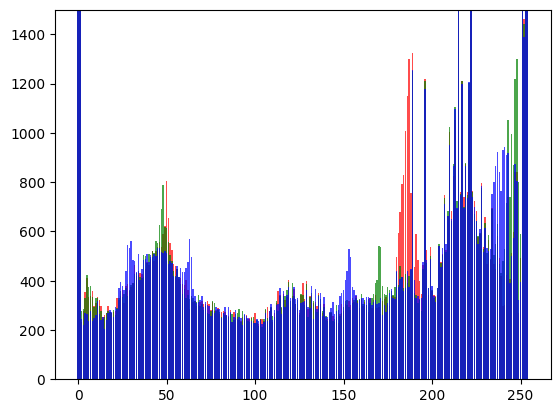

In [ ]:
root = '/kaggle/input/dataset2d/batik-sogan'

red = 0
green = 0
blue = 0

for image in os.listdir(root):
    if image.endswith('.jpg'):
        x = io.imread(root+'/'+image)
        hist_r = np.histogram(x[0], bins=255, range=[0, 255])
        hist_g = np.histogram(x[1], bins=255, range=[0, 255])
        hist_b = np.histogram(x[2], bins=255, range=[0, 255])
        red += hist_r[0]
        green += hist_g[0]
        blue += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.ylim([0,1500])
plt.bar(bins[:-1], red, color='r', alpha=0.7)
plt.bar(bins[:-1], green, color='g', alpha=0.7)
plt.bar(bins[:-1], blue, color='b', alpha=0.7)

<BarContainer object of 255 artists>

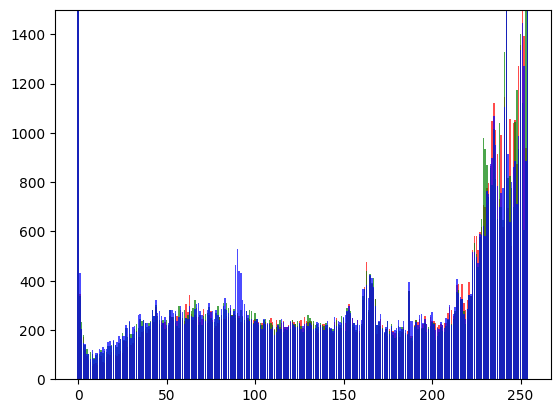

In [ ]:
root = '/kaggle/input/dataset2d/batik-tambal'

red = 0
green = 0
blue = 0

for image in os.listdir(root):
    if image.endswith('.jpg'):
        x = io.imread(root+'/'+image)
        hist_r = np.histogram(x[0], bins=255, range=[0, 255])
        hist_g = np.histogram(x[1], bins=255, range=[0, 255])
        hist_b = np.histogram(x[2], bins=255, range=[0, 255])
        red += hist_r[0]
        green += hist_g[0]
        blue += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.ylim([0,1500])
plt.bar(bins[:-1], red, color='r', alpha=0.7)
plt.bar(bins[:-1], green, color='g', alpha=0.7)
plt.bar(bins[:-1], blue, color='b', alpha=0.7)

Plot-plot diatas digunakan untuk melakukan perhitungan histogram (Red, Green, Blue) dari gambar pada folder batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, dan batik-tambal.  Plot menampilkan frekuensi intensitas piksel pada masing-masing saluran warna dalam seluruh dataset gambar.

**b. Creating Training, Validation, and Test Set**

In [ ]:
trainset = []
path = '/kaggle/input/dataset2d/'
varbatik = ['batik-sekar', 'batik-sidoluhur', 'batik-sidomukti', 'batik-sogan', 'batik-tambal']
size = 64

for batik in varbatik:
    folder = os.path.join(path, batik)
    batik_index = varbatik.index(batik)

    for image in tqdm(os.listdir(folder)):
        try:
            arr = cv2.imread(os.path.join(folder, image), cv2.IMREAD_GRAYSCALE)
            arrnew = cv2.resize(arr, (size, size))
            trainset.append([arrnew, batik_index])
        except Exception as e:
            pass
train = len(trainset)
print(train)

100%|██████████| 50/50 [00:00<00:00, 149.28it/s]

243


* Output diatas menampilkan jumlah gambar yang berhasil dibaca dan disimpan dalam variabel trainset.
* Ada 243 gambar yang berhasil dibaca.
* Ada 47 gambar yang berhasil dibaca pada folder batik-sekar.
* Ada 50 gambar yang berhasil dibaca pada folder batik-sidoluhur.
* Ada 46 gambar yang berhasil dibaca pada folder batik-sidomukti.
* Ada 50 gambar yang berhasil dibaca pada folder batik-sogan.
* Ada 50 gambar yang berhasil dibaca pada folder batik-tambal.

**One Hot Encoding**

In [ ]:
X = []
y = []
size = 64
n_class = 5

for img, label in trainset:
    imgnew = cv2.resize(img, (size, size))
    imgnew = cv2.cvtColor(imgnew, cv2.COLOR_GRAY2RGB)
    X.append(imgnew)
    y.append(label)

X = np.array(X)
y = to_categorical(y, n_class)

Mengubah format data traning `trainset` menjadi format yang dapat digunakan pada CNN.

In [ ]:
# Split data 80% training and 20% for remain set
X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size=0.8, random_state=42)

# Split the remaining data into 10% test set and 10% validation set
X_test, X_val, y_test, y_val = train_test_split(X_remain,y_remain, test_size=0.5, random_state=42)

**Augmented Data**

In [ ]:
# Augmented data
import tensorflow as tf
train_images = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.2,zoom_range=0.2,
                                                                         vertical_flip=True)
train_images = train_images.flow(X_train, y_train)

validation_images = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
validation_images = validation_images.flow(X_val, y=y_val)

**c. Arsitektur Baseline**

**Build The Model**

In [ ]:
model = keras.Sequential()

# convolutational layer 1
model.add(layers.Conv2D(64, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu", padding="valid",
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D(pool_size=(13, 13), strides= (2, 2), padding="valid"))

# convolutional layer 2
model.add(layers.Conv2D(256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# convolutional layer 3
model.add(layers.Conv2D(384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))

# convolutional layer 4
model.add(layers.Conv2D(384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))

# convolutional layer 5
model.add(layers.Conv2D(192, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.MaxPool2D(pool_size=(1, 1), strides=(1, 1)))

# flatten layer
model.add(layers.Flatten())

# fully connected layer 1
model.add(layers.Dense(4096, activation="relu"))

# fully connected layer 2
model.add(layers.Dense(4096, activation="relu"))

# output layer
model.add(layers.Dense(5, activation="softmax"))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       409856    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

Output diatas menunjukkan model arsitektur terdiri dari 5 convolutional layer dengan perbedaan ukuran kernel yang berbeda, layer-layer MaxPooling dan beberapa layer dense (fully connected layer).
* Total parameter yang digunakan pada model ini adalah 133,343,173.
* Model di-compile menggunakan categorical cross-entropy sebagai loss function, optimizer 'adam', dan metric akurasi (accuracy) untuk evaluasi performanya.

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30)

Epoch 1/30
7/7 [==============================] - 21s 3s/step - loss: 3216.3860 - accuracy: 0.2062 - val_loss: 5.4962 - val_accuracy: 0.2000
Epoch 2/30
7/7 [==============================] - 19s 3s/step - loss: 2.5710 - accuracy: 0.1753 - val_loss: 1.6711 - val_accuracy: 0.2000
Epoch 3/30
7/7 [==============================] - 19s 3s/step - loss: 1.6739 - accuracy: 0.2165 - val_loss: 1.6126 - val_accuracy: 0.2000
Epoch 4/30
7/7 [==============================] - 19s 3s/step - loss: 1.6086 - accuracy: 0.2113 - val_loss: 1.6100 - val_accuracy: 0.2000
Epoch 5/30
7/7 [==============================] - 19s 3s/step - loss: 1.6092 - accuracy: 0.2062 - val_loss: 1.6123 - val_accuracy: 0.2000
Epoch 6/30
7/7 [==============================] - 19s 3s/step - loss: 1.6084 - accuracy: 0.2062 - val_loss: 1.6129 - val_accuracy: 0.2000
Epoch 7/30
7/7 [==============================] - 19s 3s/step - loss: 1.6087 - accuracy: 0.2062 - val_loss: 1.6103 - val_accuracy: 0.1600
Epoch 8/30
7/7 [===============

* Model telah diuji menggunakan 30 epochs
* Training loss dan validation loss berkurang  secara bertahap tetapi penurunannya tidak konsisten.
* Akurasi training model dan validation model berkisar pada 0.1-0.2 tanpa peningkatan yang signifikan.
* Akurasi pada validation set sebagian besar berkisar pada 0.16 dan validation loss tidak banyak berkurang. Ini menunjukkan bahwa model tidak dapat belajar banyak dari training model dan model overfitting.

**d. Modifikasi Arsitektur**

In [ ]:
# Tuning the model
model = keras.Sequential()

# convolutational layer 1
model.add(layers.Conv2D(64, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu", padding="valid",
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D(pool_size=(13, 13), strides= (2, 2), padding="valid"))

# convolutational layer 2
model.add(layers.Conv2D(256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="same"))

model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# convolutational layer (tuning)
model.add(layers.Conv2D(256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="same"))

model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# convolutational layer 3
model.add(layers.Conv2D(384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.MaxPool2D(pool_size=(1, 1), strides=(1, 1)))

# convolutational layer 4
model.add(layers.Conv2D(384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.MaxPool2D(pool_size=(1, 1), strides=(1, 1)))

# convolutational layer 5
model.add(layers.Conv2D(192, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.MaxPool2D(pool_size=(1, 1), strides=(1, 1)))

# convolutational layer (tuning)
model.add(layers.Conv2D(192, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.MaxPool2D(pool_size=(1, 1), strides=(1, 1)))

# flatten layer
model.add(layers.Flatten())

# fully connected layer 1
model.add(layers.Dense(4096, activation="relu"))
# tuning
model.add(Dropout(0.5))

# fully connected layer 2
model.add(layers.Dense(4096, activation="relu"))
# tuning
model.add(Dropout(0.5))

# output layer
model.add(layers.Dense(5, activation="softmax"))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Output diatas menunjukkan model arsitektur yang terdiri dari 4 convolutional layer. Disini saya melakukan tuning dengan menambahkan drop out dan mengurangi 1 layer (layer 5) untuk mengurangi overfitting.
* Total parameter yang digunakan pada model ini adalah 133,343,173.
* Model di-compile menggunakan categorical cross-entropy sebagai loss function, optimizer 'adam', dan metric akurasi (accuracy) untuk evaluasi performanya.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 256)       409856    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 256)       1638656   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 256)       

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=40)

Epoch 1/40
7/7 [==============================] - 15s 2s/step - loss: 53.0790 - accuracy: 0.2113 - val_loss: 1.6158 - val_accuracy: 0.2400
Epoch 2/40
7/7 [==============================] - 12s 2s/step - loss: 1.6223 - accuracy: 0.1907 - val_loss: 1.5983 - val_accuracy: 0.2000
Epoch 3/40
7/7 [==============================] - 13s 2s/step - loss: 1.6045 - accuracy: 0.1804 - val_loss: 1.5972 - val_accuracy: 0.2000
Epoch 4/40
7/7 [==============================] - 12s 2s/step - loss: 1.5722 - accuracy: 0.2577 - val_loss: 1.6460 - val_accuracy: 0.2000
Epoch 5/40
7/7 [==============================] - 12s 2s/step - loss: 1.5987 - accuracy: 0.2680 - val_loss: 1.5530 - val_accuracy: 0.2000
Epoch 6/40
7/7 [==============================] - 12s 2s/step - loss: 1.5584 - accuracy: 0.3299 - val_loss: 1.5173 - val_accuracy: 0.2400
Epoch 7/40
7/7 [==============================] - 12s 2s/step - loss: 1.5179 - accuracy: 0.3351 - val_loss: 1.5885 - val_accuracy: 0.2800
Epoch 8/40
7/7 [=================

* Model telah diuji menggunakan 40 epochs
* Training loss dan validation loss berkurang  secara bertahap tetapi penurunannya tidak konsisten.
* Akurasi training model berkisar pada 0.2 - 0.4 dan validation model 0.1 - 0. 2 tanpa peningkatan yang signifikan.
* Akurasi pada validation set sebagian besar berkisar pada 0.2 dan validation loss tidak banyak berkurang.
* Setelah melakukan tuning, nilai akurasi naik tetapi model tetap overfitting.

**Evaluasi**

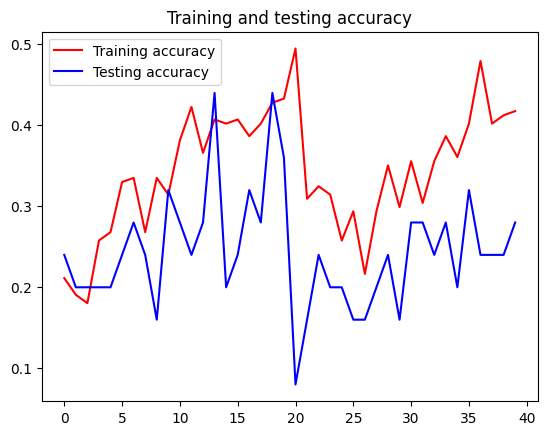

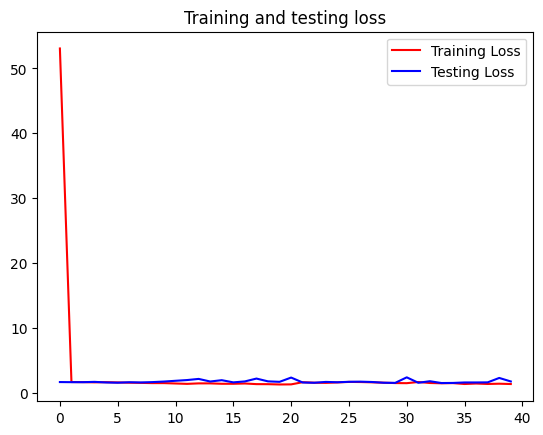

In [ ]:
import matplotlib.pyplot as plt
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Testing accuracy')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Testing Loss')
plt.title('Training and testing loss')
plt.legend()

Grafik training dan testing diatas berarti:
* Grafik training accuracy pada akhirnya naik setelah mengalami penurunan, berarti model sedang belajar untuk meningkatkan kemampuan dalam mempelajari pola training.
* Grafik testing accuracy pada akhirnya naik setelah mengalami penurunan, berarti model semakin baik.


Grafik training and testing loss diatas berarti:
* Grafik training loss turun berarti model semakin baik belajar pola dan model semakin konvergen
* Grafik testing turun setelah sempat mengalami beberapa kenaikan, berarti model berhasil belajar

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 284ms/step - loss: 1.9834 - accuracy: 0.2917


[1.9834179878234863, 0.2916666567325592]

Hasil prediksi diatas memiliki nilai loss 1.9 dengan accuracy 30%. Disini semakin rendah nilai loss dan tinggi akurasi berarti semakin baik. Tetapi, setelah melakukan tuning model diatas accuracy masih belum cukup tinggi untuk model digunakan sebagai prediksi.

**Ground Truth dan Prediction Result**

In [ ]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)
category = np.argmax(y_test, axis=1)
model_pred = np.argmax(model_pred, axis=1)
print(classification_report(category, model_pred))

print("Ground Truth:", category)
print("Predicted Result:",model_pred)

1/1 [==============================] - 1s 519ms/step
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.25      0.75      0.38         4
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.29        24
   macro avg       0.22      0.28      0.22        24
weighted avg       0.26      0.29      0.25        24

Ground Truth: [0 0 0 3 3 4 1 0 0 3 4 2 0 4 0 2 1 3 0 3 2 1 1 2]
Predicted Result: [0 0 1 1 4 1 1 1 0 0 1 1 2 0 1 2 2 4 1 4 0 1 1 1]


Output diatas merepresentasikan nilai asli dengan nilai prediksi menggunakan model serta menampilkan metrics accuracy dari model.

**f. Video Presentasi**

Link Video : https://youtu.be/Jby9-l9CkcA